<h1 align="center">CNN with CIFAR10</h1>

    Nathaniel Neubert
    2/6/2021

In [1]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

We begin by importing the dataset fashion mnist and then cleaning the data.

In [2]:
(train_x, train_y), (test_x, test_y) = datasets.cifar10.load_data()

In [3]:
# Normalize pixel values to be between 0 and 1
train_x = train_x / 255.0
test_x = test_x / 255.0

In [4]:
#This list corresponds to the naming code used for the fashion_mnist set.
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

In [5]:
#Here we plot a few sample images from our dataset to see the type of data we are working with
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_x[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_y[i][0]])
plt.show()

Building the model

For this model we will use the following order of layers: convolutional, pooling, convolutional, pooling, dropout, convolutional, pooling, dropout, flatten, dense, output.

In [28]:
#Initialize the model
model = models.Sequential()
model.add(layers.Conv2D(32,(5,5),activation = 'relu', input_shape=(32,32,3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (4, 4), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.15))
model.add(layers.Conv2D(64, (4, 4), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.15))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))



In [29]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 28, 28, 32)        2432      
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 11, 11, 64)        32832     
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 2, 2, 64)          65600     
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 1, 1, 64)         

In [32]:
#Here we train the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_x, train_y, epochs=25, 
                    validation_data=(test_x, test_y))

Epoch 1/25
1563/1563 [==============================] - 49s 31ms/step - loss: 0.9193 - accuracy: 0.6770 - val_loss: 0.9557 - val_accuracy: 0.6682
Epoch 2/25
1563/1563 [==============================] - 47s 30ms/step - loss: 0.8990 - accuracy: 0.6828 - val_loss: 0.9287 - val_accuracy: 0.6724
Epoch 3/25
1563/1563 [==============================] - 46s 29ms/step - loss: 0.8805 - accuracy: 0.6904 - val_loss: 0.9297 - val_accuracy: 0.6736
Epoch 4/25
1563/1563 [==============================] - 51s 33ms/step - loss: 0.8631 - accuracy: 0.6938 - val_loss: 0.9464 - val_accuracy: 0.6719
Epoch 5/25
1563/1563 [==============================] - 49s 31ms/step - loss: 0.8426 - accuracy: 0.7045 - val_loss: 0.9273 - val_accuracy: 0.6805
Epoch 6/25
1563/1563 [==============================] - 49s 31ms/step - loss: 0.8334 - accuracy: 0.7065 - val_loss: 0.8909 - val_accuracy: 0.6921
Epoch 7/25
1563/1563 [==============================] - 47s 30ms/step - loss: 0.8171 - accuracy: 0.7129 - val_loss: 0.9217 -

In this first chart, we show the results of training for 10 epochs. While this is not incredibly accurate, one important thing is that our model is not overfit to the data. We know this because the validation accuaracy is very near to the accuracy of the model on the training data.

313/313 - 2s - loss: 0.9441 - accuracy: 0.6691


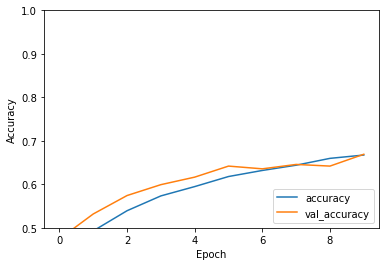

In [31]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_x,  test_y, verbose=2)

Training for an additional 25 epochs we are able to further improve our accuracy but only slightly. We also begin to run into the danger of overfitting.

In [33]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_x,  test_y, verbose=2)

313/313 - 2s - loss: 0.8348 - accuracy: 0.7196


In [34]:
print(test_acc)

0.7196000218391418


Overall I am happy with this score, while it isn't perfect, I was able to modify the model and thus achieve a slightly higher score than I saw online.